# Data Loading


In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("IndianCovid.csv")
df['v2'] = df.text
df['v1'] = df.sentiment
df.head()

,Unnamed: 0,sentiment,text,v2,v1
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,sad
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,joy
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,joy
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,sad
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,sad


In [26]:
def rev_sentence(sentence): 
  
    # first split the string into words 
    words = sentence.split(' ') 
  
    # then reverse the split string list and join using space 
    reverse_sentence = ' '.join(reversed(words)) 
  
    # finally return the joined string 
    return reverse_sentence 

def double_sentence(sentence):

    return sentence + ' ' + sentence

def rev_concat(sentence):

    return sentence + ' ' + rev_sentence(sentence)

In [27]:
set(df.v1)

{'anger', 'fear', 'joy', 'sad'}

In [28]:
l = []
for i in df.v1:
  if i == 'anger':
    l.append(0)
  elif i == 'fear':
    l.append(1)
  elif i == 'joy':
    l.append(2)
  else:
    l.append(3)
df.v1 = l
df.head()

# 0 - anger, 1 - fear, 2 - joy, 3 - sad

,Unnamed: 0,sentiment,text,v2,v1
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,3
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,2
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,2
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,3
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,3


In [29]:
# import string
# df.v2 = df.v2.str.translate(str.maketrans('', '', string.punctuation))
df.v2 = [rev_sentence(i) for i in df.v2]
df.head()

,Unnamed: 0,sentiment,text,v2,v1
0,3204,sad,agree the poor in india are treated badly thei...,hospitals in foc treated case 19 covid if fine...,3
1,1431,joy,if only i could have spent the with this cutie...,… republik crossing coast h g n i sakshi__s vc...,2
2,654,joy,will nature conservation remain a priority in ...,star daily the | bangladesh corona post in pri...,2
3,2530,sad,coronavirus disappearing in italy show this to...,"… work not do lockdowns say who ""intellectuals...",3
4,2296,sad,uk records lowest daily virus death toll since...,govt lockdown of start since toll death virus ...,3


We will split the data into train, val, and test sets.  
`train_texts`, `val_texts`, and `test_texts` should contain a list of text examples in the dataset.


In [30]:
# 0.15 for val, 0.15 for test, 0.7 for train
val_size = int(df.shape[0] * 0.15)
test_size = int(df.shape[0] * 0.15)

# Shuffle the data
df = df.sample(frac=1)
# Split df to test/val/train
test_df = df[:test_size]
val_df = df[test_size:test_size+val_size]
train_df = df[test_size+val_size:]


train_texts, train_labels = list(train_df.v2), list(train_df.v1)
val_texts, val_labels     = list(val_df.v2), list(val_df.v1)
test_texts, test_labels   = list(test_df.v2), list(test_df.v1)


# Check that idces do not overlap
assert set(train_df.index).intersection(set(val_df.index)) == set({})
assert set(test_df.index).intersection(set(train_df.index)) == set({})
assert set(val_df.index).intersection(set(test_df.index)) == set({})
# Check that all idces are present
assert df.shape[0] == len(train_labels) + len(val_labels) + len(test_labels)

# Sizes
print(
    f"Size of initial data: {df.shape[0]}\n"
    f"Train size: {len(train_labels)}\n"
    f"Val size: {len(val_labels)}\n"
    f"Test size: {len(test_labels)}\n"
)

Size of initial data: 3090
Train size: 2164
Val size: 463
Test size: 463



In [31]:
train_texts[:10] # Just checking the examples in train_text

['" cure the find and up speed will we and stores all up stocking are we coronavirus the of positive tested been have i unfortunately because you of all from office my in myself isolate will i why is that around going coronavirus the with concerned all are we know i "everyone',
 '… outbreak coronavirus the to vulnerable especially groups these left have sanitation poor and restrictions movement overcrowding',
 'happened coronavirus then and together shit anxiety my having to close really was i when remember',
 'covid before was it as it keep and great be would transfers free extra 2 or 1 but transfers unlimited not',
 'com/yi7uia2t7y twitter pic rip 19 covid to due away passed composer music',
 'scary pretty quick real serious got coronavirus this',
 'coronavirus the for guns and bullets buying are ppl thing oddest the',
 '… the of because lose to going are students our time much how confirm not still is it as of students teach to used be communication of system this can done well job'

# Download and Load GloVe Embeddings
We will use GloVe embedding parameters to initialize our layer of word representations / embedding layer.
Let's download and load glove.





In [32]:
#@title Download GloVe word embeddings

# === Download GloVe word embeddings
# !wget http://nlp.stanford.edu/data/glove.6B.zip

# === Unzip word embeddings and use only the top 50000 word embeddings for speed
# !unzip glove.6B.zip
# !head -n 50000 glove.6B.300d.txt > glove.6B.300d__50k.txt

# === Download Preprocessed version
!wget https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu -O glove_split.aa
!wget https://docs.google.com/uc?id=1LF2yD2jToXriyD-lsYA5hj03f7J3ZKaY -O glove_split.ab
!wget https://docs.google.com/uc?id=1N1xnxkRyM5Gar7sv4d41alyTL92Iip3f -O glove_split.ac
!cat glove_split.?? > 'glove.6B.300d__50k.txt'

--2021-05-09 04:32:46--  https://docs.google.com/uc?id=1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.138, 74.125.195.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i5jvtactsa7rjpkckfi8p58a4dnfmgql/1620534750000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu [following]
--2021-05-09 04:32:50--  https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/i5jvtactsa7rjpkckfi8p58a4dnfmgql/1620534750000/14514704803973256873/*/1KMJTagaVD9hFHXFTPtNk0u2JjvNlyCAu
Resolving doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)|74.125.20.13

## Load GloVe Embeddings

In [33]:
def load_glove(glove_path, embedding_dim):
    with open(glove_path) as f:
        token_ls = [PAD_TOKEN, UNK_TOKEN]
        embedding_ls = [np.zeros(embedding_dim), np.random.rand(embedding_dim)]
        for line in f:
            token, raw_embedding = line.split(maxsplit=1)
            token_ls.append(token)
            embedding = np.array([float(x) for x in raw_embedding.split()])
            embedding_ls.append(embedding)
        embeddings = np.array(embedding_ls)
    return token_ls, embeddings

PAD_TOKEN = '<PAD>'
UNK_TOKEN = '<UNK>'
EMBEDDING_DIM=300 # dimension of Glove embeddings
glove_path = "glove.6B.300d__50k.txt"
vocab, embeddings = load_glove(glove_path, EMBEDDING_DIM)

## Import packages

In [34]:
!pip install sacremoses

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
import pandas as pd
import sacremoses
from torch.utils.data import dataloader, Dataset
from tqdm.auto import tqdm

# Tokenize text data.
We will use the `tokenize` function to convert text data into sequence of indices.

In [35]:
def tokenize(data, labels, tokenizer, vocab, max_seq_length=128):
    vocab_to_idx = {word: i for i, word in enumerate(vocab)}
    text_data = []
    label_data = []
    for ex in tqdm(data):
        tokenized = tokenizer.tokenize(ex.lower())
        ids = [vocab_to_idx.get(token, 1) for token in tokenized]
        text_data.append(ids)
    return text_data, labels
tokenizer = sacremoses.MosesTokenizer()
train_data_indices, train_labels = tokenize(train_texts, train_labels, tokenizer, vocab)
val_data_indices, val_labels = tokenize(val_texts, val_labels, tokenizer, vocab)
test_data_indices, test_labels = tokenize(test_texts, test_labels, tokenizer, vocab)

In [36]:
print("\nTrain text first 5 examples:\n", train_data_indices[:5])
print("\nTrain labels first 5 examples:\n", train_labels[:5])


Train text first 5 examples:
 [[1, 8119, 2, 598, 7, 62, 1514, 45, 55, 7, 1934, 66, 62, 22422, 34, 55, 1, 2, 5, 1337, 3496, 53, 35, 43, 4718, 115, 83, 5, 66, 27, 285, 194, 8, 3263, 13181, 45, 43, 740, 16, 14, 206, 224, 1, 2, 19, 1625, 66, 34, 55, 348, 43, 1, 1404], [10092, 3855, 1, 2, 6, 4592, 860, 505, 160, 220, 35, 11625, 994, 7, 3254, 928, 22193], [1581, 1, 129, 7, 602, 34857, 7474, 194, 520, 6, 385, 590, 17, 43, 63, 2717], [1, 108, 17, 22, 21, 22, 580, 7, 355, 32, 56, 8867, 417, 2006, 234, 48, 178, 36, 8867, 10187, 38], [10110, 276, 1, 10362, 42775, 14520, 906, 1, 6, 447, 422, 1255, 4960, 405]]

Train labels first 5 examples:
 [1, 3, 1, 2, 3]


# Create DataLoaders 

In [37]:
import numpy as np
import torch
from torch.utils.data import Dataset

class SpamDataset(Dataset):
    """
    Class that represents a train/validation/test dataset that's readable for PyTorch
    Note that this class inherits torch.utils.data.Dataset
    """
    
    def __init__(self, data_list, target_list, max_sent_length=128):
        """
        @param data_list: list of data tokens 
        @param target_list: list of data targets 

        """
        self.data_list = data_list
        self.target_list = target_list
        self.max_sent_length = max_sent_length
        assert (len(self.data_list) == len(self.target_list))

    def __len__(self):
        return len(self.data_list)
        
    def __getitem__(self, key, max_sent_length=None):
        """
        Triggered when you call dataset[i]
        """
        if max_sent_length is None:
            max_sent_length = self.max_sent_length
        token_idx = self.data_list[key][:max_sent_length]
        label = self.target_list[key]
        return [token_idx, label]

    def spam_collate_func(self,batch):
        """
        Customized function for DataLoader that dynamically pads the batch so that all 
        data have the same length
        """ 
        data_list = [] # store padded sequences
        label_list = []
        max_batch_seq_len = None # the length of longest sequence in batch
                                 # if it is less than self.max_sent_length
                                 # else max_batch_seq_len = self.max_sent_length

        """
          # Pad the sequences in your data 
          # if their length is less than max_batch_seq_len
          # or trim the sequences that are longer than self.max_sent_length
          # return padded data_list and label_list

        """
        label_list = [datum[1] for datum in batch]
        max_batch_seq_len = max(len(datum[0]) for datum in batch)
        if max_batch_seq_len > self.max_sent_length:
            max_batch_seq_len = self.max_sent_length

        for datum in batch:
            padded_vec = np.pad(np.array(datum[0]), 
                                    pad_width=((0,max_batch_seq_len-len(datum[0]))), 
                                    mode="constant", constant_values=0)
            data_list.append(padded_vec)
        data_list = torch.from_numpy(np.array(data_list))
        label_list = torch.LongTensor(label_list)        

        return [data_list, label_list]

BATCH_SIZE = 64
max_sent_length=128
train_dataset = SpamDataset(train_data_indices, train_labels, max_sent_length)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=True)

val_dataset = SpamDataset(val_data_indices, val_labels, train_dataset.max_sent_length)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=False)

test_dataset = SpamDataset(test_data_indices, test_labels, train_dataset.max_sent_length)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           collate_fn=train_dataset.spam_collate_func,
                                           shuffle=False)



Let's try to print out an batch from train_loader.


In [38]:
data_batch, labels = next(iter(train_loader))
print("data batch dimension: ", data_batch.size())
print("data_batch: ", data_batch)
print("labels: ", labels)

data batch dimension:  torch.Size([64, 54])
data_batch:  tensor([[ 3940,    52,  3093,  ...,     0,     0,     0],
        [ 7496,     1,  3922,  ...,     0,     0,     0],
        [ 1259,  6327, 34486,  ...,     0,     0,     0],
        ...,
        [10092,  8202, 10092,  ...,     0,     0,     0],
        [10110,   276,     1,  ...,  1050,     0,     0],
        [ 2742,     2, 19907,  ...,     0,     0,     0]])
labels:  tensor([3, 0, 3, 0, 2, 0, 3, 0, 2, 1, 3, 1, 2, 3, 0, 1, 1, 1, 3, 1, 0, 3, 0, 2,
        3, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 3, 0,
        0, 2, 1, 1, 0, 0, 2, 0, 2, 3, 0, 1, 3, 3, 1, 2])


# Build a LSTM Classifier

In [39]:
# First import torch related libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

class LSTMClassifier(nn.Module):
    """
    LSTMClassifier classification model
    """
    def __init__(self, embeddings, hidden_size, num_layers, num_classes, bidirectional, dropout_prob=0.3):
        super().__init__()
        self.embedding_layer = self.load_pretrained_embeddings(embeddings)
        self.dropout = None
        self.lstm = None
        self.non_linearity = None # For example, ReLU
        self.clf = None # classifier layer
        """
           define the components of your LSTM Classifier model

        """
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = nn.Dropout(p = dropout_prob)
        self.lstm = nn.LSTM(embeddings.shape[1], hidden_size, num_layers, batch_first=True, 
                            bidirectional=bidirectional, dropout=0.3)
        self.relu = nn.ReLU()
        # self.clf = nn.Linear(hidden_size*2, num_classes)
        self.clf = nn.Linear(hidden_size, num_classes)
    
    def load_pretrained_embeddings(self, embeddings):

        embedding_layer = nn.Embedding(embeddings.shape[0], embeddings.shape[1], padding_idx=0)
        embedding_layer.weight.data = torch.Tensor(embeddings).float()
        return embedding_layer


    def forward(self, inputs):
        logits = None

        batch_size = inputs.size()[0] # inputs : batch_sz, seq_len
        out = self.dropout(self.embedding_layer(inputs))
        out, _ = self.lstm(out, None)
        out = out.mean(1)
        out = self.relu(out)
        #out = self.relu(torch.mean(out,1))
        logits = self.clf(out)
        return logits

First, we will define an evaluation function that will return the accuracy of the model. We will use this to compute validation accuracy and test accuracy of the model given a dataloader.

In [40]:
def evaluate(model, dataloader, device):
    accuracy = None
    model.eval()

    n_correct = n_total = 0 
    model.eval()
    with torch.no_grad():
        
        for (data_batch, batch_labels) in dataloader:
            out = model(data_batch.to(device))
            max_scores, preds = out.max(dim=1)
            #preds = np.argmax(out, axis=1).cpu().numpy()
            n_correct += np.sum(preds.cpu().numpy() == batch_labels.numpy())
            n_total += out.shape[0]
    accuracy = n_correct*1.0/n_total
    return accuracy 

# Initialize the LSTM classifier model, criterion and optimizer


In [41]:
# LSTM hyperparameters
hidden_size = 32
num_layers = 1
num_classes = 4
bidirectional=False
torch.manual_seed(1234)

# if cuda exists, use cuda, else run on cpu
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device=torch.device('cpu')

model = LSTMClassifier(embeddings, hidden_size, num_layers, num_classes, bidirectional)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


# Train model with early stopping 

In [42]:
train_loss_history = []
val_accuracy_history = []
best_val_accuracy = 0
n_no_improve = 0
early_stop_patience=2
NUM_EPOCHS=10
  
for epoch in tqdm(range(NUM_EPOCHS)):
    model.train() # this enables regularization, which we don't currently have
    for i, (data_batch, batch_labels) in enumerate(train_loader):
        """
           Code for training lstm
           Keep track of training of for each batch using train_loss_history
        """
        preds = model(data_batch.to(device))
        loss = criterion(preds, batch_labels.to(device))
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_loss_history.append(loss.item())
        
    # The end of a training epoch 


    cur_val_accuracy = evaluate(model, val_loader, device=device)
    val_accuracy_history.append(cur_val_accuracy)
    print("epoch: {}, val_accuracy: {}".format(epoch+1, cur_val_accuracy))
    if cur_val_accuracy > best_val_accuracy:
        best_val_accuracy = cur_val_accuracy
        torch.save(model, 'best_model.pt')
        n_no_improve = 0
    else:
        n_no_improve += 1 
    if n_no_improve > early_stop_patience:
        print("Early stopped at epoch ",epoch)
        break

    

print("Best validation accuracy is: ", best_val_accuracy)

epoch: 1, val_accuracy: 0.5637149028077754
epoch: 2, val_accuracy: 0.6328293736501079
epoch: 3, val_accuracy: 0.652267818574514
epoch: 4, val_accuracy: 0.6695464362850972
epoch: 5, val_accuracy: 0.6501079913606912
epoch: 6, val_accuracy: 0.6630669546436285
epoch: 7, val_accuracy: 0.6479481641468683
Early stopped at epoch  6
Best validation accuracy is:  0.6695464362850972


# Draw training curve 
X-axis: training steps, Y-axis: training loss

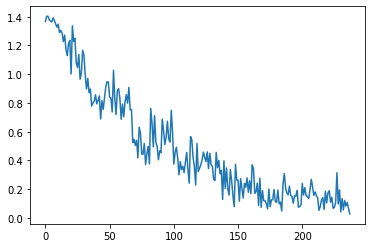

In [43]:
pd.Series(train_loss_history).plot()

# Validation accuracy curve
X-axis: Epochs, Y-axis: validation accuracy

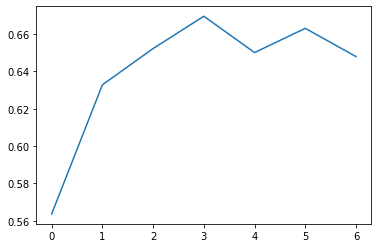

In [44]:
pd.Series(val_accuracy_history).plot()

# Test Accuracy

In [45]:
# Reload best model from saved checkpoint
# Compute test accuracy
model = torch.load('best_model.pt')
test_accuracy = evaluate(model, test_loader, device)


print(test_accuracy)

0.6371490280777538
